In [1]:
import pandas as pd
import numpy as np


In [2]:
myfile ='Crystal_violet_data.xlsx'

In [5]:
crystal_violet_data = pd.read_excel(myfile)

In [7]:
crystal_violet_data.head()

,Delta_R,Delta_G,Delta_B,Concentration_ppm,Dye_Name,Ro,Go,Bo,New Sensitivity
0,0.690000,0.343000,2.171000,10,Crystal violet,38.834,17.696,121.416,1.800546
1,0.454500,1.545400,5.544000,10,Crystal violet,38.834,17.696,121.416,4.239432
2,0.555440,1.884400,3.544000,10,Crystal violet,38.834,17.696,121.416,3.362728
3,0.920981,0.371719,2.461329,10,Crystal violet,38.834,17.696,121.416,2.109645
4,0.467695,1.728910,5.574422,10,Crystal violet,38.834,17.696,121.416,4.367071


In [9]:
crystal_violet_data = pd.concat([
    crystal_violet_data[crystal_violet_data['Concentration_ppm'] == 0],
    crystal_violet_data[crystal_violet_data['Concentration_ppm'] != 0]
])
crystal_violet_data.reset_index(drop=True, inplace=True)
crystal_violet_data.head(15)

,Delta_R,Delta_G,Delta_B,Concentration_ppm,Dye_Name,Ro,Go,Bo,New Sensitivity
0,2.403000,3.961000,1.562000,0,Crystal violet,38.834,17.696,121.416,4.454160
1,1.025500,2.155000,3.015500,0,Crystal violet,38.834,17.696,121.416,3.481955
2,3.001550,3.025500,2.025500,0,Crystal violet,38.834,17.696,121.416,4.525277
3,2.564893,4.159934,1.604534,0,Crystal violet,38.834,17.696,121.416,4.680836
4,1.068053,2.167149,3.114762,0,Crystal violet,38.834,17.696,121.416,3.568478
5,3.101595,3.044835,2.213112,0,Crystal violet,38.834,17.696,121.416,4.697797
6,2.646587,4.238108,1.733872,0,Crystal violet,38.834,17.696,121.416,4.843361
7,1.199031,2.247819,3.293263,0,Crystal violet,38.834,17.696,121.416,3.787729
8,3.282575,3.244418,2.273989,0,Crystal violet,38.834,17.696,121.416,4.945873
9,2.757013,4.424682,1.918042,0,Crystal violet,38.834,17.696,121.416,5.113763


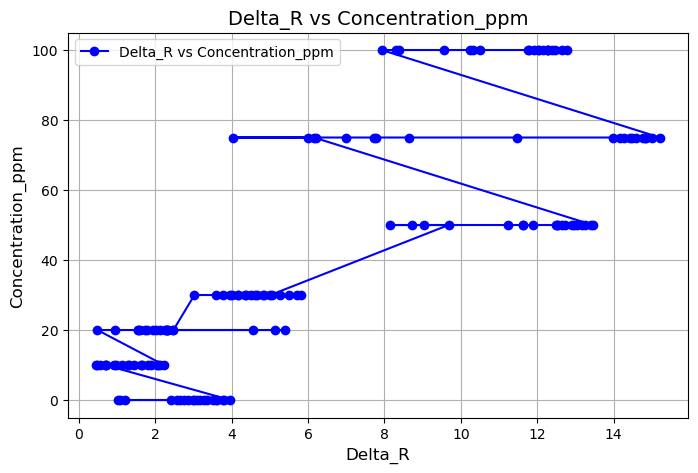

In [11]:
import matplotlib.pyplot as plt
x_column = 'Delta_R'
y_column = 'Concentration_ppm'

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(crystal_violet_data[x_column], crystal_violet_data[y_column], marker='o', linestyle='-', color='b', label=f'{x_column} vs {y_column}')
plt.title(f'{x_column} vs {y_column}', fontsize=14)
plt.xlabel(x_column, fontsize=12)
plt.ylabel(y_column, fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

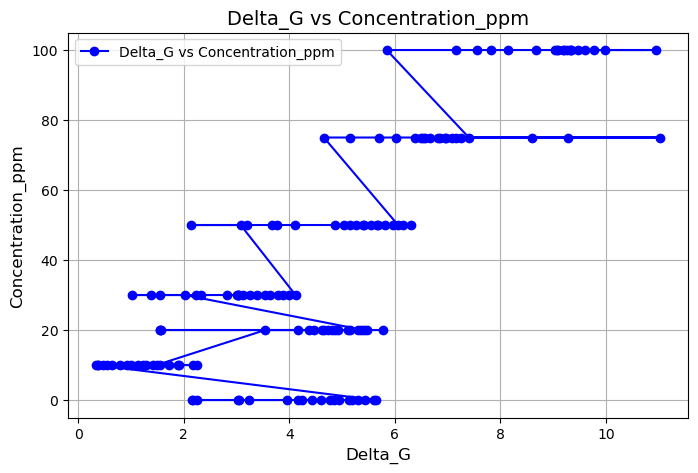

In [13]:
import matplotlib.pyplot as plt
x_column = 'Delta_G'
y_column = 'Concentration_ppm'

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(crystal_violet_data[x_column], crystal_violet_data[y_column], marker='o', linestyle='-', color='b', label=f'{x_column} vs {y_column}')
plt.title(f'{x_column} vs {y_column}', fontsize=14)
plt.xlabel(x_column, fontsize=12)
plt.ylabel(y_column, fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

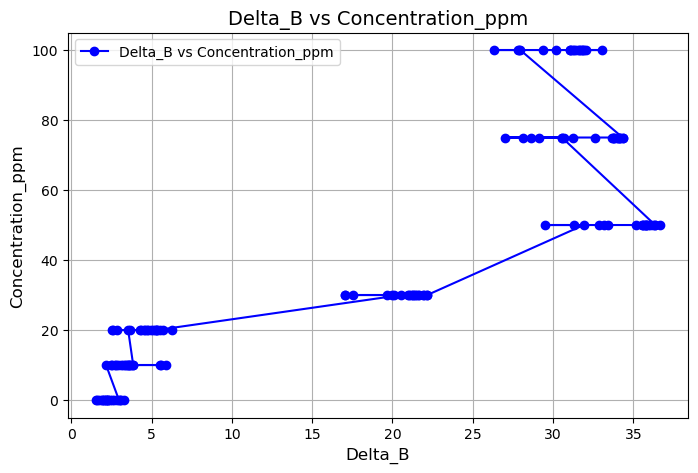

In [15]:
import matplotlib.pyplot as plt
x_column = 'Delta_B'
y_column = 'Concentration_ppm'

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(crystal_violet_data[x_column], crystal_violet_data[y_column], marker='o', linestyle='-', color='b', label=f'{x_column} vs {y_column}')
plt.title(f'{x_column} vs {y_column}', fontsize=14)
plt.xlabel(x_column, fontsize=12)
plt.ylabel(y_column, fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

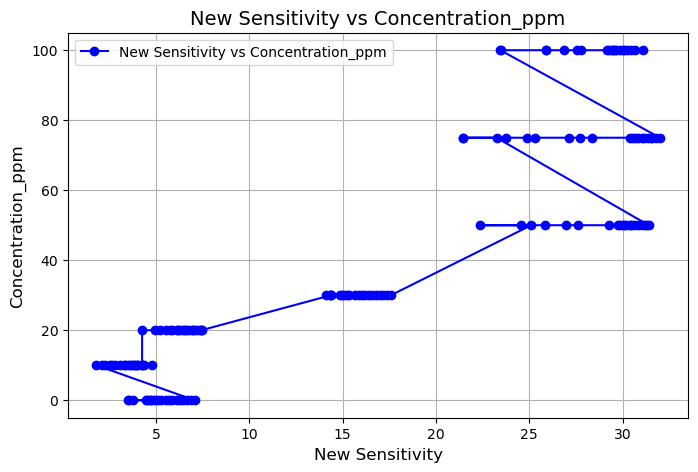

In [17]:
import matplotlib.pyplot as plt
x_column = 'New Sensitivity'
y_column = 'Concentration_ppm'

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(crystal_violet_data[x_column], crystal_violet_data[y_column], marker='o', linestyle='-', color='b', label=f'{x_column} vs {y_column}')
plt.title(f'{x_column} vs {y_column}', fontsize=14)
plt.xlabel(x_column, fontsize=12)
plt.ylabel(y_column, fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

# Dataset preparation
X = crystal_violet_data[['Delta_R','Delta_G','Delta_B','New Sensitivity']]  # Single feature
y = crystal_violet_data['Concentration_ppm']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling for specific models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function for evaluation
def evaluate_model(model, X_train, y_train, X_test, y_test, cv=5):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    metrics = {
        "train_r2": r2_score(y_train, y_train_pred),
        "test_r2": r2_score(y_test, y_test_pred),
        "train_mae": mean_absolute_error(y_train, y_train_pred),
        "test_mae": mean_absolute_error(y_test, y_test_pred),
        "train_mse": mean_squared_error(y_train, y_train_pred),
        "test_mse": mean_squared_error(y_test, y_test_pred),
    }
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
    metrics["cv_mean"] = np.mean(cv_scores)
    metrics["cv_std"] = np.std(cv_scores)
    
    return metrics

# Results dictionary
results = {}


In [20]:
print("Linear Regression Results:")
lr_model = LinearRegression()
results['Linear Regression'] = evaluate_model(lr_model, X_train, y_train, X_test, y_test)

print("Ridge Regression Results:")
ridge_model = Ridge(alpha=0.1)
results['Ridge Regression'] = evaluate_model(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)

print("Lasso Regression Results:")
lasso_model = Lasso(alpha=0.1)
results['Lasso Regression'] = evaluate_model(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

print("Decision Tree Regressor Results:")
dtr_model = DecisionTreeRegressor(random_state=42)
results['Decision Tree'] = evaluate_model(dtr_model, X_train, y_train, X_test, y_test)

print("Random Forest Regressor Results:")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
results['Random Forest'] = evaluate_model(rf_model, X_train, y_train, X_test, y_test)

print("XGBoost Regressor Results:")
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
results['XGBoost'] = evaluate_model(xgb_model, X_train_scaled, y_train, X_test_scaled, y_test)


Linear Regression Results:
Ridge Regression Results:
Lasso Regression Results:
Decision Tree Regressor Results:
Random Forest Regressor Results:
XGBoost Regressor Results:


In [22]:
# Print a summary of all models
for model, metrics in results.items():
    print(f"\n{model} Results:")
    print(f"  Train R²: {metrics['train_r2']:.3f}")
    print(f"  Test R²: {metrics['test_r2']:.3f}")
    print(f"  Train MAE: {metrics['train_mae']:.3f}")
    print(f"  Test MAE: {metrics['test_mae']:.3f}")
    print(f"  Train MSE: {metrics['train_mse']:.3f}")
    print(f"  Test MSE: {metrics['test_mse']:.3f}")
    print(f"  CV R² Mean: {metrics['cv_mean']:.3f} (±{metrics['cv_std']:.3f})")



Linear Regression Results:
  Train R²: 0.832
  Test R²: 0.873
  Train MAE: 11.357
  Test MAE: 10.698
  Train MSE: 185.786
  Test MSE: 152.926
  CV R² Mean: 0.811 (±0.039)

Ridge Regression Results:
  Train R²: 0.832
  Test R²: 0.874
  Train MAE: 11.354
  Test MAE: 10.656
  Train MSE: 185.791
  Test MSE: 152.226
  CV R² Mean: 0.811 (±0.039)

Lasso Regression Results:
  Train R²: 0.832
  Test R²: 0.878
  Train MAE: 11.331
  Test MAE: 10.337
  Train MSE: 186.098
  Test MSE: 147.427
  CV R² Mean: 0.811 (±0.038)

Decision Tree Results:
  Train R²: 1.000
  Test R²: 0.905
  Train MAE: 0.000
  Test MAE: 4.821
  Train MSE: 0.000
  Test MSE: 115.179
  CV R² Mean: 0.947 (±0.029)

Random Forest Results:
  Train R²: 0.996
  Test R²: 0.957
  Train MAE: 0.925
  Test MAE: 3.895
  Train MSE: 4.048
  Test MSE: 52.135
  CV R² Mean: 0.975 (±0.010)

XGBoost Results:
  Train R²: 1.000
  Test R²: 0.949
  Train MAE: 0.011
  Test MAE: 3.812
  Train MSE: 0.002
  Test MSE: 62.122
  CV R² Mean: 0.908 (±0.100)


In [25]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the Random Forest model with default hyperparameters
rf_model = RandomForestRegressor(n_estimators=100,   # 100 trees
                                 max_depth=None,     # No limit to tree depth
                                 min_samples_split=3, # Minimum samples to split a node
                                 min_samples_leaf=1,  # Minimum samples at a leaf node
                                 bootstrap=True,      # Use bootstrapping for sampling
                                 random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on training and test set
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

# Calculate R², MAE, and MSE
train_r2_rf = r2_score(y_train, y_pred_train_rf)
test_r2_rf = r2_score(y_test, y_pred_test_rf)
train_mae_rf = mean_absolute_error(y_train, y_pred_train_rf)
test_mae_rf = mean_absolute_error(y_test, y_pred_test_rf)
train_mse_rf = mean_squared_error(y_train, y_pred_train_rf)
test_mse_rf = mean_squared_error(y_test, y_pred_test_rf)

# Print the evaluation metrics
print(f"Random Forest - Train R²: {train_r2_rf}")
print(f"Random Forest - Test R²: {test_r2_rf}")
print(f"Random Forest - Train MAE: {train_mae_rf}")
print(f"Random Forest - Test MAE: {test_mae_rf}")
print(f"Random Forest - Train MSE: {train_mse_rf}")
print(f"Random Forest - Test MSE: {test_mse_rf}")

Random Forest - Train R²: 0.9953018483286926
Random Forest - Test R²: 0.9574183142834517
Random Forest - Train MAE: 1.0310267857142856
Random Forest - Test MAE: 3.9077380952380953
Random Forest - Train MSE: 5.20211495535714
Random Forest - Test MSE: 51.4388392857143


In [87]:
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

# Define the XGBoost model with default hyperparameters
xgboost_model = xgb.XGBRegressor(n_estimators=100,      # 100 boosting rounds (trees)
                                 max_depth=2,           # Depth of each tree
                                 learning_rate=0.2,     # Learning rate to control the weight of each tree
                                 subsample=0.8,         # Use 80% of the data to fit each tree
                                 colsample_bytree=0.8,  # Use 80% of the features to fit each tree
                                 objective='reg:squarederror',  # Regression task
                                 reg_alpha= 0.3,
                                 random_state=42)

# Fit the model on the training data
xgboost_model.fit(X_train, y_train)

# Predict on training and test set
y_pred_train_xgb = xgboost_model.predict(X_train)
y_pred_test_xgb = xgboost_model.predict(X_test)

# Calculate R², MAE, and MSE
train_r2_xgb = r2_score(y_train, y_pred_train_xgb)
test_r2_xgb = r2_score(y_test, y_pred_test_xgb)
train_mae_xgb = mean_absolute_error(y_train, y_pred_train_xgb)
test_mae_xgb = mean_absolute_error(y_test, y_pred_test_xgb)
train_mse_xgb = mean_squared_error(y_train, y_pred_train_xgb)
test_mse_xgb = mean_squared_error(y_test, y_pred_test_xgb)

# Print the evaluation metrics
print(f"XGBoost - Train R²: {train_r2_xgb}")
print(f"XGBoost - Test R²: {test_r2_xgb}")
print(f"XGBoost - Train MAE: {train_mae_xgb}")
print(f"XGBoost - Test MAE: {test_mae_xgb}")
print(f"XGBoost - Train MSE: {train_mse_xgb}")
print(f"XGBoost - Test MSE: {test_mse_xgb}")

# Test the model with a sample input
sample_input = [[6,3, 17, 16]]  # Replace with appropriate feature values
sample_prediction = xgboost_model.predict(sample_input)

print(f"Prediction for sample input {sample_input}: {sample_prediction[0]:.2f}")

XGBoost - Train R²: 0.9984599351882935
XGBoost - Test R²: 0.9662361741065979
XGBoost - Train MAE: 0.8901072761842183
XGBoost - Test MAE: 4.1930884293147495
XGBoost - Train MSE: 1.7052337514296596
XGBoost - Test MSE: 40.78681275427601
Prediction for sample input [[6, 3, 17, 16]]: 25.05


<H1>XGBoost is best here</H1>

In [89]:
import joblib

# Save the XGBoost model to a file
joblib.dump(xgboost_model, 'acetaldehyde_crystal_violet_xgboost_model.pkl')
print("XGBoost model saved as acetaldehyde_crystal_violet_xgboost_model.pkl")

XGBoost model saved as acetaldehyde_crystal_violet_xgboost_model.pkl


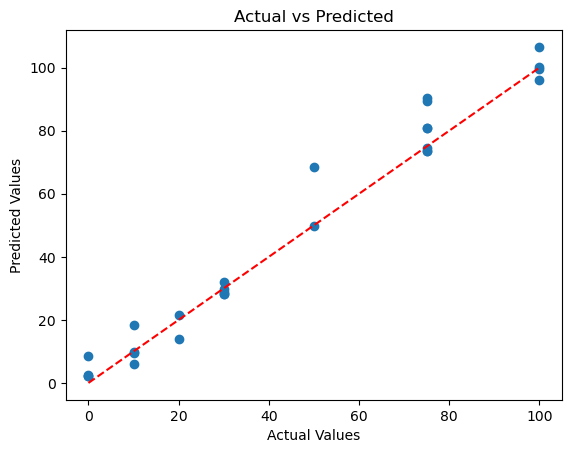

In [91]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_test_xgb)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()
